# 1. Data Exploration

In [19]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [20]:
sns.set_theme(style="darkgrid")

In [21]:
data = pd.read_csv("./data/Train/training.csv")

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    29692 non-null  int64  
 1   surface_x                     29692 non-null  float64
 2   surface_y                     29692 non-null  float64
 3   bh_x                          27605 non-null  float64
 4   bh_y                          27605 non-null  float64
 5   standardized_operator_name    29692 non-null  int64  
 6   gross_perforated_length       22135 non-null  float64
 7   number_of_stages              2752 non-null   float64
 8   total_proppant                19080 non-null  float64
 9   total_fluid                   19076 non-null  float64
 10  true_vertical_depth           28197 non-null  float64
 11  ffs_frac_type                 14585 non-null  object 
 12  proppant_intensity            18971 non-null  float64
 13  f

In [23]:
data.describe()

,Unnamed: 0,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,...,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,pad_id,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
count,29692.000000,2.969200e+04,2.969200e+04,2.760500e+04,2.760500e+04,29692.000000,22135.000000,2752.000000,1.908000e+04,1.907600e+04,...,18656.000000,1.865600e+04,22135.000000,29692.000000,14768.000000,2.869100e+04,2.869100e+04,2.898100e+04,2.898100e+04,19306.000000
mean,14847.414051,1.020863e+06,1.075477e+06,1.020478e+06,1.079357e+06,1157.264347,6533.676565,28.240552,7.624826e+05,4.020891e+06,...,0.231901,inf,1.380596,109024.135828,49.523158,1.020062e+06,1.078012e+06,1.020469e+06,1.076462e+06,219.854511
std,8574.811270,1.721561e+05,3.156502e+05,1.702888e+05,3.162917e+05,107.281214,2504.368680,13.612821,8.122641e+05,2.721153e+06,...,1.166795,NaN,0.481280,5196.020035,63.104234,1.703143e+05,3.155907e+05,1.713936e+05,3.155836e+05,155.790160
min,0.000000,5.357005e+05,4.951165e+05,5.323590e+05,4.957629e+05,1001.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,7.830841e-03,0.000000,100001.000000,0.000000,5.400136e+05,4.961486e+05,5.323590e+05,4.957629e+05,0.011905
25%,7422.750000,8.903506e+05,8.043973e+05,8.911762e+05,8.061600e+05,1060.000000,4341.535433,17.000000,3.642857e+05,1.871676e+06,...,0.162421,4.268300e+00,1.000000,104516.000000,24.000000,8.914115e+05,8.051170e+05,8.908974e+05,8.046434e+05,107.918152
50%,14845.500000,1.019947e+06,9.893755e+05,1.017596e+06,1.000664e+06,1144.000000,6684.055118,27.000000,7.013834e+05,3.564951e+06,...,0.194734,5.135199e+00,1.500000,109018.500000,38.000000,1.018147e+06,9.986236e+05,1.017865e+06,9.938718e+05,192.767887
75%,22268.250000,1.133213e+06,1.366018e+06,1.132495e+06,1.369018e+06,1231.000000,8899.114173,38.000000,1.087321e+06,5.843925e+06,...,0.234285,6.156844e+00,2.000000,113492.000000,60.000000,1.132536e+06,1.367010e+06,1.132084e+06,1.366495e+06,298.073218
max,30091.000000,1.728209e+06,1.811475e+06,1.729432e+06,1.811882e+06,1354.000000,15744.094490,70.000000,9.109073e+07,3.442402e+07,...,127.700206,inf,3.000000,117976.000000,4827.000000,1.728874e+06,1.811592e+06,1.729656e+06,1.811770e+06,2855.469490


In [24]:
# Get rid of the inf value
data = data[data["frac_fluid_to_proppant_ratio"] != float('inf')]

C:\Users\Bayzhan\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


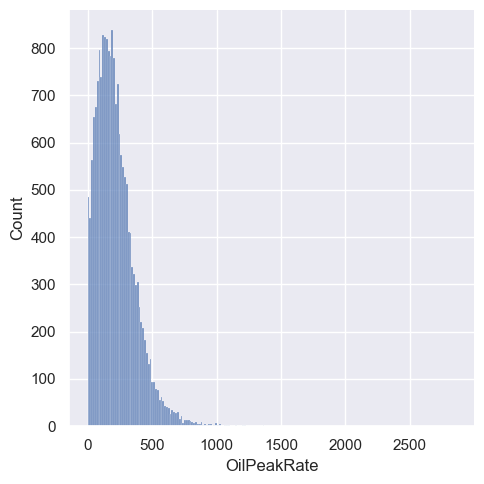

In [46]:
sns.displot(data=data["OilPeakRate"])

## Missing Values Exploration

In [25]:
print("Percent of OilPeakRate missing: ", 100*data["OilPeakRate"].isna().sum() / len(data["OilPeakRate"]))

Percent of OilPeakRate missing:  34.98029705971506


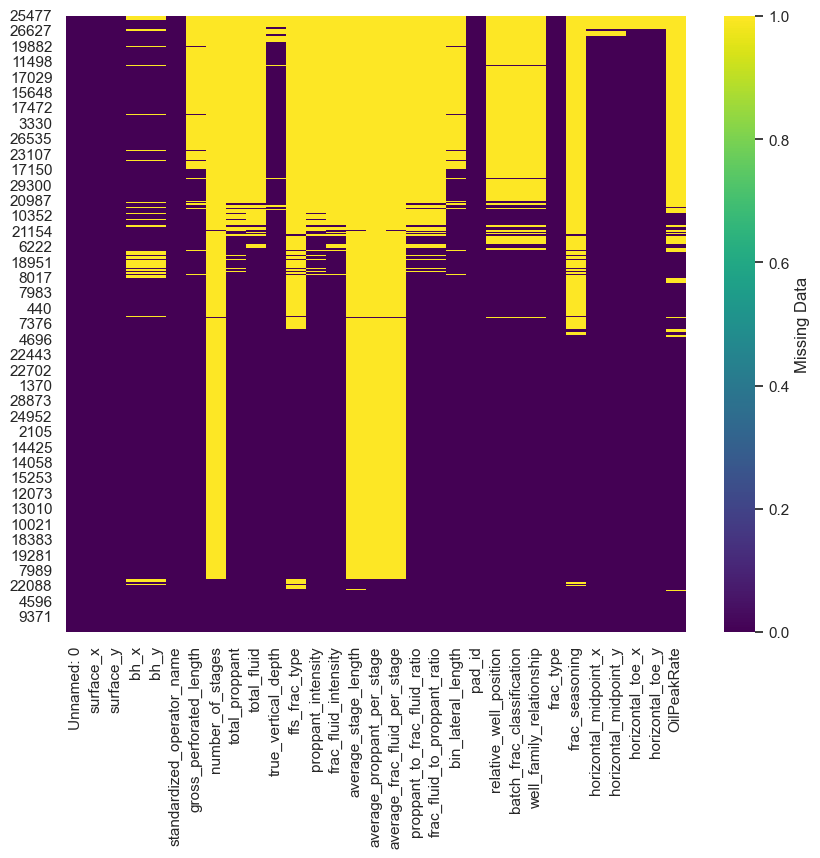

In [26]:
missing_values_sum = data.isna().sum(axis=1)

# Get the sorted indices based on the sum of missing values
sorted_indices = missing_values_sum.sort_values(ascending=False).index
sorted_df = data.loc[sorted_indices]

plt.figure(figsize=(10, 8))
sns.heatmap(sorted_df.isna(), cmap='viridis', cbar_kws={'label': 'Missing Data'})
plt.show()


In [27]:
data_x = data.dropna(subset=['OilPeakRate'])

missing_dict = {}

for i in data.columns:
    missing_dict[i] = [100*round((data[i].isna().sum())/len(data), 2), 100*round((data_x[i].isna().sum())/len(data_x), 2)]

midding_df = pd.DataFrame(missing_dict).transpose()
midding_df.columns = ["% nan", "% nan w/ valid OilPeakRate"]
midding_df

,% nan,% nan w/ valid OilPeakRate
Unnamed: 0,0.0,0.0
surface_x,0.0,0.0
surface_y,0.0,0.0
bh_x,7.0,7.0
bh_y,7.0,7.0
standardized_operator_name,0.0,0.0
gross_perforated_length,25.0,1.0
number_of_stages,91.0,86.0
total_proppant,36.0,7.0
total_fluid,36.0,7.0


In [28]:
data_x = data.dropna(subset = ["OilPeakRate"])

### number_of_stages, average_stage_length, average_proppant_per_stage, average_frac_fluid_per_stage

In [29]:
# We drop the featues missing more than 86% of the data
features_to_drop = [ 'number_of_stages', 'average_stage_length', 'average_proppant_per_stage', 'average_frac_fluid_per_stage', "standardized_operator_name" ]
data = data.drop(columns = features_to_drop)

### frac_type

In [30]:
data.dropna(subset = ["OilPeakRate"])["frac_type"].unique()

array(['Primary Frac'], dtype=object)

In [31]:
# Drop frac_type since the onle type appearring in the valid OilPeakRate values are Primary Frac
data = data.drop(columns = ["frac_type"])

### pad_id

In [32]:
data["pad_id"]

0        102604
1        108497
2        108526
3        105631
4        103717
          ...  
29687    117032
29688    117032
29689    117032
29690    117032
29691    117032
Name: pad_id, Length: 29691, dtype: int64

C:\Users\Bayzhan\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


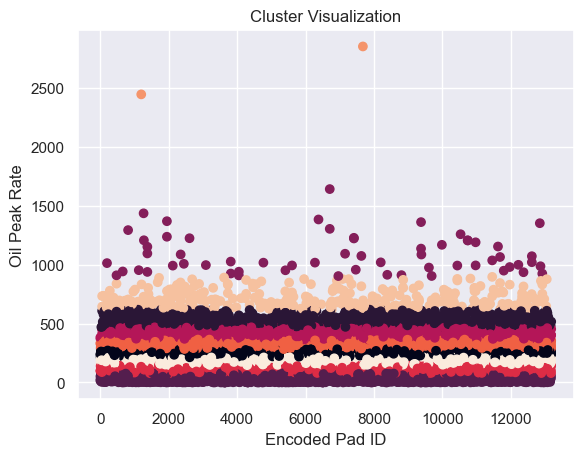

In [33]:
df = data_x.copy()
df["pad_id"] = df["pad_id"].fillna("NAN")

label_encoder = LabelEncoder()
df['pad_id_encoded'] = label_encoder.fit_transform(df['pad_id'])

kmeans = KMeans(n_clusters=10) 
df['cluster'] = kmeans.fit_predict(df[['OilPeakRate']])

plt.scatter(df['pad_id_encoded'], df['OilPeakRate'], c=df['cluster'])
plt.xlabel('Encoded Pad ID')
plt.ylabel('Oil Peak Rate')
plt.title('Cluster Visualization')
plt.show()

In [34]:
# Since we don't see any patters or clusters for pad_id's, drop "pad_id"
data = data.drop(columns = ["pad_id"])

<Axes: xlabel='surface_x', ylabel='surface_y'>

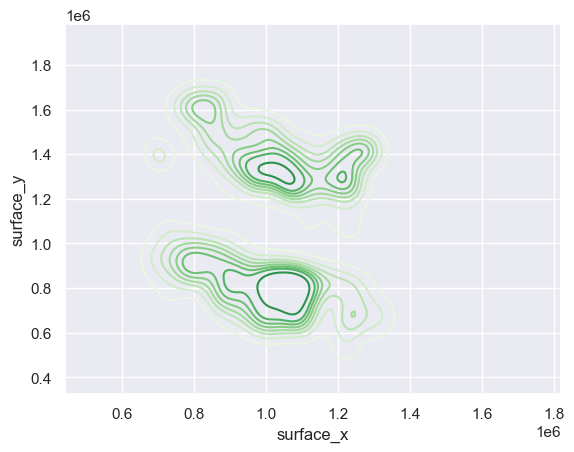

In [42]:
sns.kdeplot(data, x = "surface_x", y = "surface_y", cmap='Greens', fill=False, thresh=0, levels=10)

<Axes: xlabel='surface_x', ylabel='surface_y'>

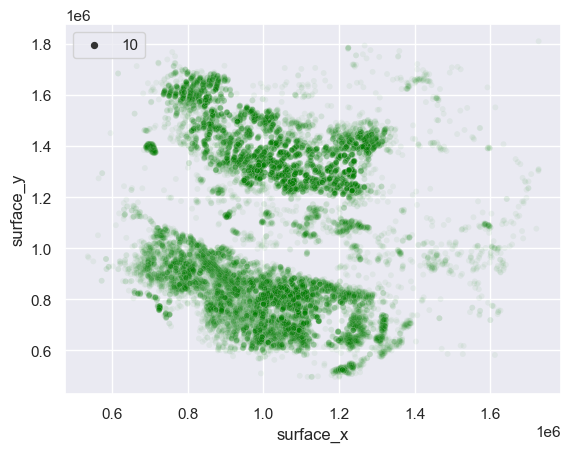

In [43]:
sns.scatterplot(x=data["surface_x"], y=data["surface_y"], alpha = 0.05, size = 10, color = "green")

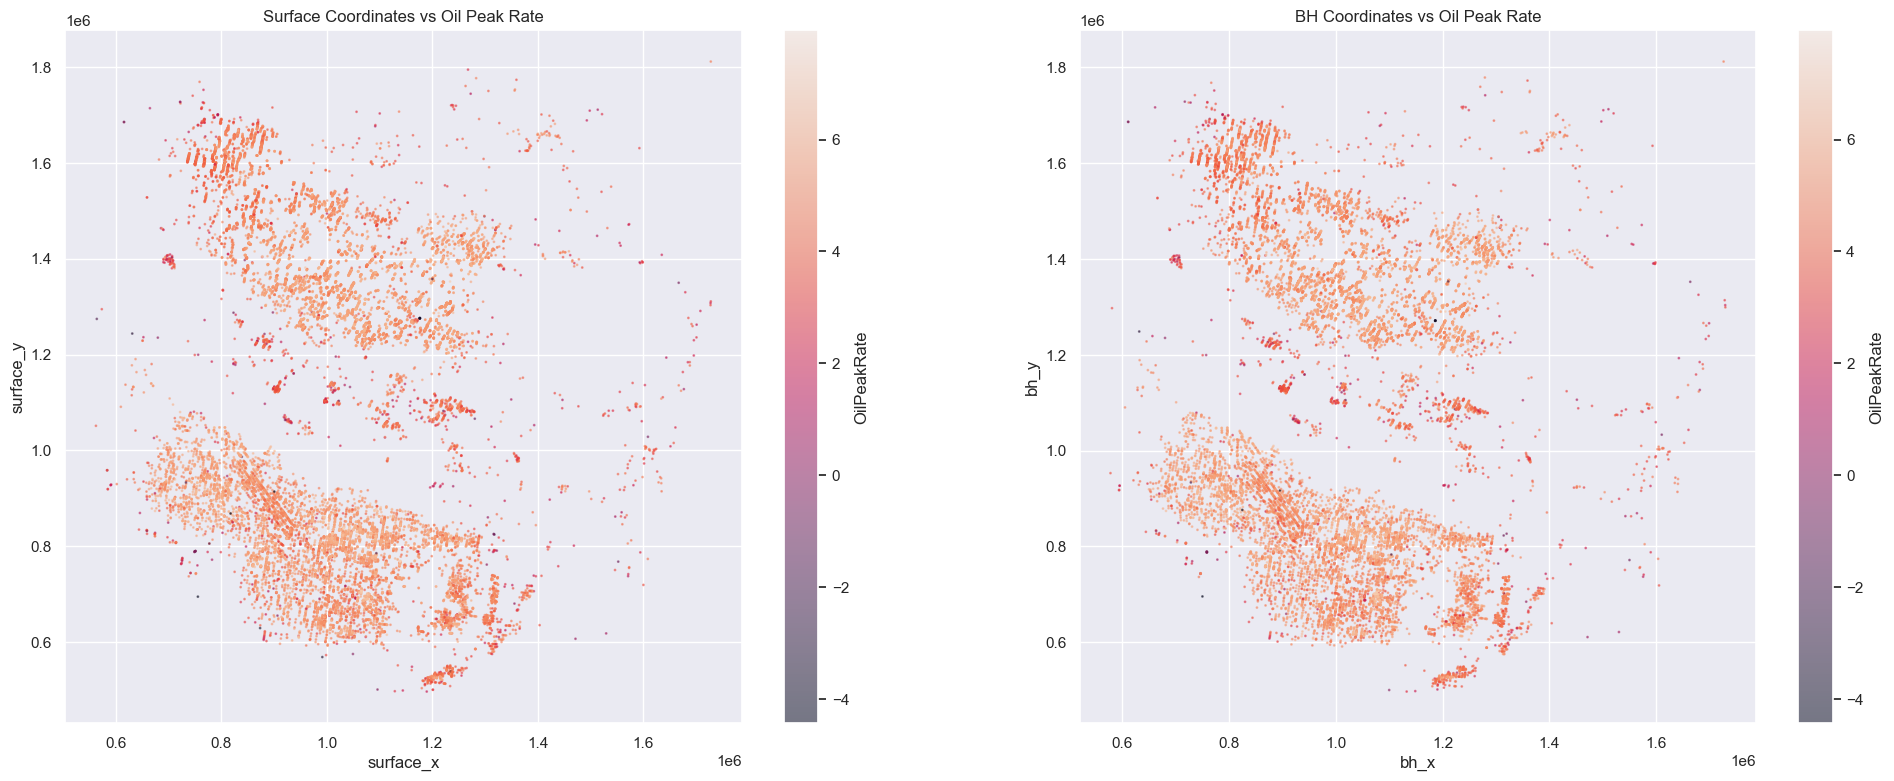

In [55]:
plt.figure(figsize=(24, 9))

# First subplot
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(list(data['surface_x']), list(data['surface_y']), c=np.log(list(data['OilPeakRate'])), s=1, alpha=0.5)
plt.colorbar(scatter1, label='OilPeakRate')
plt.xlabel('surface_x')
plt.ylabel('surface_y')
plt.title('Surface Coordinates vs Oil Peak Rate')

# Second subplot
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(list(data['bh_x']), list(data['bh_y']), c=np.log(list(data['OilPeakRate'])), s=1, alpha=0.5)
plt.colorbar(scatter2, label='OilPeakRate')
plt.xlabel('bh_x')
plt.ylabel('bh_y')
plt.title('BH Coordinates vs Oil Peak Rate')

plt.show()

In [38]:
# New Column: euclidean distance between surface xy and hottom hole xy
data["dist_surf_bh"] = np.sqrt((data["surface_x"] - data["bh_x"])**2 + (data["surface_y"] - data["bh_y"])**2)

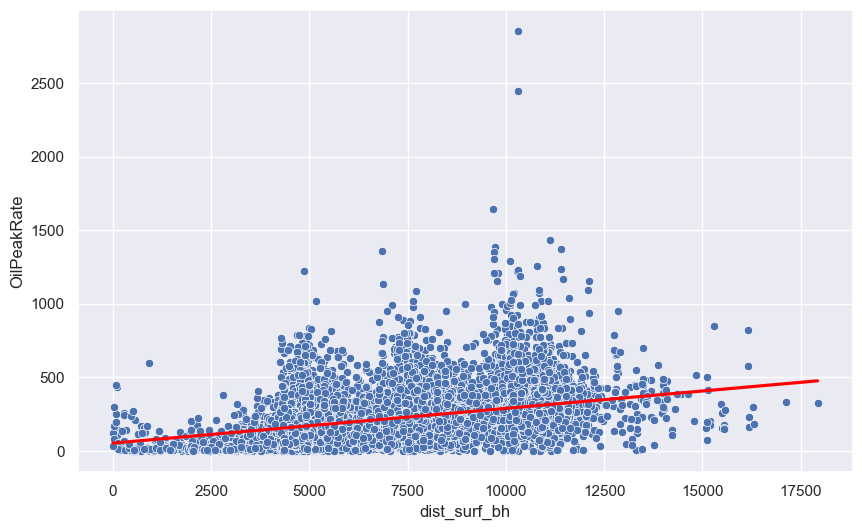

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='dist_surf_bh', y='OilPeakRate')

# Fit a regression line to the scatterplot
sns.regplot(data=data, x='dist_surf_bh', y='OilPeakRate', scatter=False, color='red')

plt.show()

Since it makes sense of "dist_surf_bh" to affect OilPeakRate and imputing the missing values is risky because we are considering the differences, we will drop the 7& of missing rows of bh_x and bh_y

# A set of featues with similar behavior

total_proppant, total_fluid, true_vertical_depth, proppant_intensity, frac_fluid_intensity
proppant_to_frac_fluid_ratio, frac_fluid_to_proppant_ratio

C:\Users\Bayzhan\AppData\Local\Temp\ipykernel_26884\4227870056.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], kde=False)


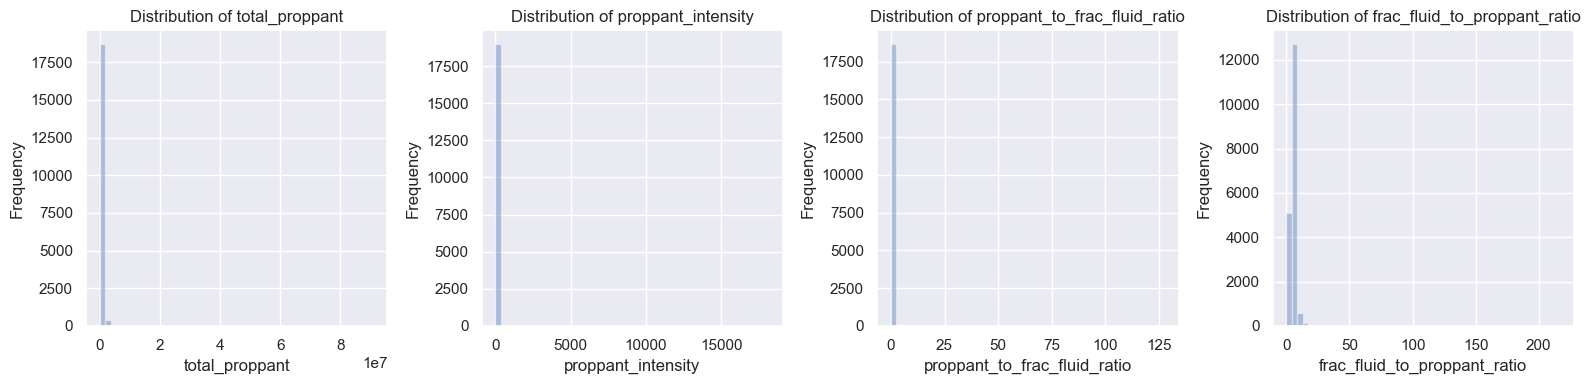

In [65]:
features = ["total_proppant", "proppant_intensity", "proppant_to_frac_fluid_ratio", "frac_fluid_to_proppant_ratio"]

# Determine the layout of the subplots
n_rows = 1  # One row
n_cols = 4  # Four columns

plt.figure(figsize=(16, 4))  # Adjust the size of the entire figure

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.distplot(data[feature], kde=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [66]:
# We will take the logarithms of these

C:\Users\Bayzhan\AppData\Local\Temp\ipykernel_26884\2662613772.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], kde=False)


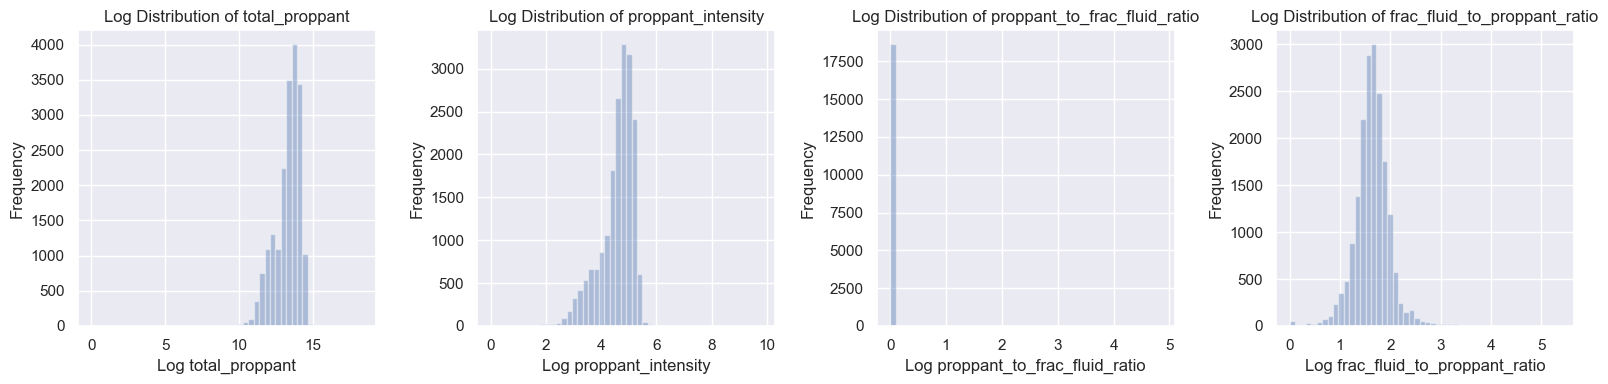

In [67]:
features = ["total_proppant", "proppant_intensity", "proppant_to_frac_fluid_ratio", "frac_fluid_to_proppant_ratio"]

# Taking the logarithm of the features, while handling any zeros or negative values
for feature in features:
    data[feature] = np.log(data[feature].clip(lower=1))  # clip lower values to 1 to avoid log(0) or log(negative)

# Determine the layout of the subplots
n_rows = 1  # One row
n_cols = 4  # Four columns

plt.figure(figsize=(16, 4))  # Adjust the size of the entire figure

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.distplot(data[feature], kde=False)
    plt.title(f'Log Distribution of {feature}')
    plt.xlabel(f'Log {feature}')
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Categorical Features behaving in a similar way

In [68]:
# We have found that the categories includ "Undecided" and "Undefined", and they behave different from the missing categories

<Axes: xlabel='OilPeakRate', ylabel='Count'>

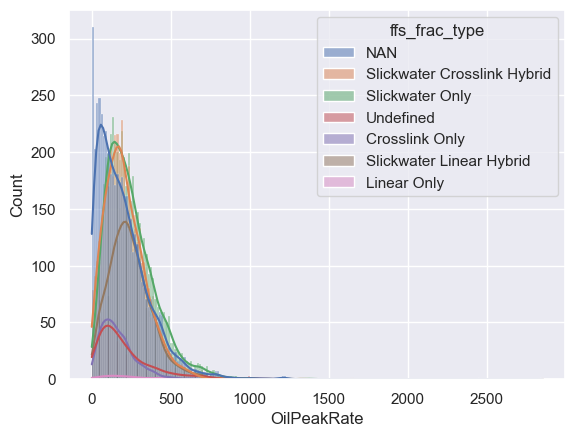

In [70]:
data["ffs_frac_type"] = data["ffs_frac_type"].fillna("NAN")
data.groupby(["ffs_frac_type"])["OilPeakRate"].mean()
sns.histplot(data=data, x="OilPeakRate", hue="ffs_frac_type", kde=True)

<Axes: xlabel='OilPeakRate', ylabel='Count'>

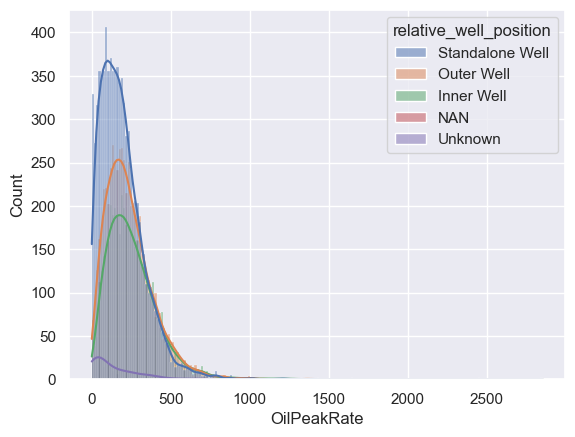

In [71]:
data["relative_well_position"] = data["relative_well_position"].fillna("NAN")
sns.histplot(data=data, x="OilPeakRate", hue="relative_well_position", kde=True)

<Axes: xlabel='OilPeakRate', ylabel='Count'>

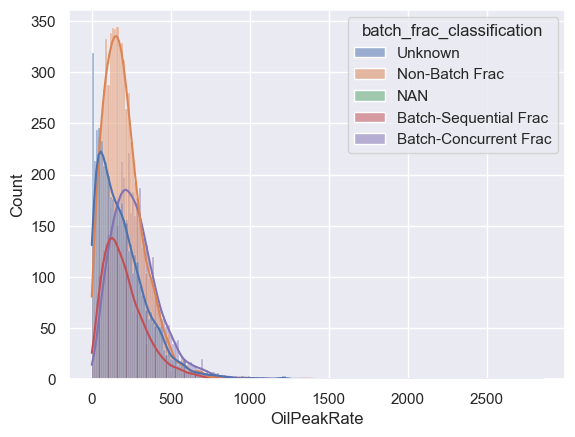

In [72]:
data = data.dropna(subset=['relative_well_position'])
data["batch_frac_classification"] = data["batch_frac_classification"].fillna("NAN")
sns.histplot(data=data, x="OilPeakRate", hue="batch_frac_classification", kde=True)

In [73]:
# For each of the featues above, categories will be one-hot-encoded